In [3]:
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
{"date":1483920000,"high":916.41833046,"low":880,"open":916.41832969,"close":902,"volume":1561326.5181909,"quoteVolume":1743.42476903,"weightedAverage":895.55141462}

{'date': 1483920000,
 'high': 916.41833046,
 'low': 880,
 'open': 916.41832969,
 'close': 902,
 'volume': 1561326.5181909,
 'quoteVolume': 1743.42476903,
 'weightedAverage': 895.55141462}

In [8]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

In [10]:
df = CryptoData('USDT_BTC', 86400)['close']

In [17]:
df.head()

date
2015-02-19    244.00
2015-02-20    240.25
2015-02-21    245.00
2015-02-22    235.00
2015-02-23    235.00
Name: close, dtype: float64

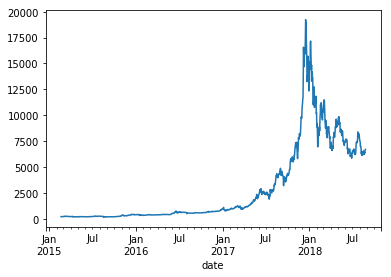

In [15]:
df.plot()

In [16]:
df.pct_change().describe()

count    1283.000000
mean        0.003471
std         0.041927
min        -0.318834
25%        -0.012744
50%         0.003079
75%         0.020539
max         0.270148
Name: close, dtype: float64

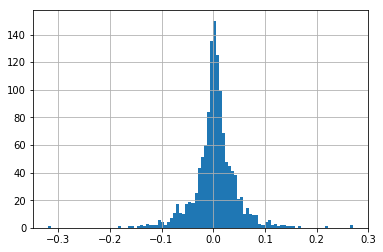

In [18]:
df.pct_change().hist(bins=100)

In [19]:
def CryptoDataCSV(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
tickers = ['USDT_BTC','USDT_BCH','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
 'USDT_XRP','USDT_LTC','USDT_NXT','USDT_STR','USDT_REP','USDT_ZEC']

In [25]:
# CryptoDataCSV()
for ticker in tickers:
    CryptoDataCSV(ticker, 86400)

Processed: USDT_BTC
Processed: USDT_BCH
Processed: USDT_ETC
Processed: USDT_XMR
Processed: USDT_ETH
Processed: USDT_DASH
Processed: USDT_XRP
Processed: USDT_LTC
Processed: USDT_NXT
Processed: USDT_STR
Processed: USDT_REP
Processed: USDT_ZEC


In [26]:
tickers =  ['USDT_BTC','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
 'USDT_XRP','USDT_LTC','USDT_NXT','USDT_STR','USDT_REP','USDT_ZEC']

In [27]:
crypto_df = pd.DataFrame()
for ticker in tickers:
    crypto_df[ticker] = pd.read_csv(ticker+'.csv', index_col = 'date')['close']
crypto_df.dropna(inplace=True)

In [28]:
crypto_df.head()

,USDT_BTC,USDT_ETC,USDT_XMR,USDT_ETH,USDT_DASH,USDT_XRP,USDT_LTC,USDT_NXT,USDT_STR,USDT_REP,USDT_ZEC
date,,,,,,,,,,,
2016-10-28,692.697963,0.944770,5.750000,11.138401,9.026266,0.008044,3.984000,0.006718,0.002005,4.492158,5000.000000
2016-10-29,713.146873,0.892350,5.238681,10.468392,8.647079,0.007732,4.086000,0.006231,0.001976,4.000000,1900.000003
2016-10-30,702.100001,0.928215,5.644789,11.245677,9.772380,0.008023,4.025000,0.006687,0.002146,4.600239,595.346627
2016-10-31,702.701161,0.900000,5.164843,11.021996,9.191216,0.008164,3.980000,0.006300,0.001971,4.474915,1600.180411
2016-11-01,734.969999,0.882124,4.775320,10.837498,9.139394,0.008028,4.115966,0.006438,0.001947,4.108232,1306.000009


In [30]:
crypto_df_norm = crypto_df.divide(crypto_df.iloc[0])

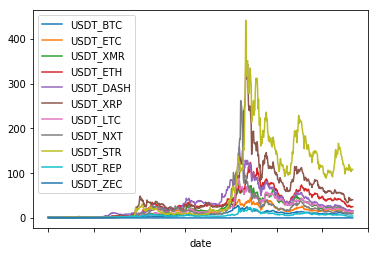

In [31]:
crypto_df_norm.plot()

In [32]:
crypto_df_pct = crypto_df.pct_change().dropna()

In [34]:
corr = crypto_df_pct.corr()

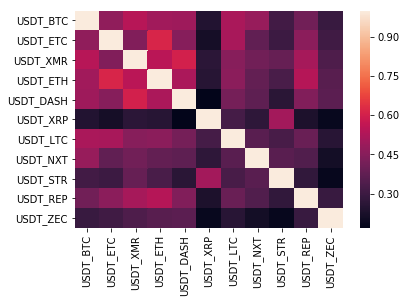

In [37]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [38]:
corr['USDT_XMR']['USDT_DASH']

0.6024330278425207

Text(0,0.5,'USDT_XMR % Return')

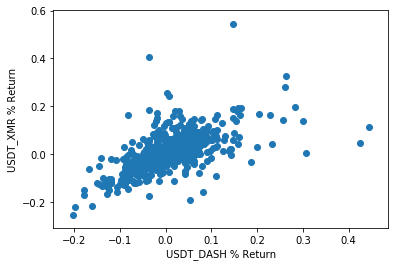

In [39]:
plt.scatter(crypto_df_pct['USDT_DASH'],crypto_df_pct['USDT_XMR'])
plt.xlabel('USDT_DASH % Return')
plt.ylabel('USDT_XMR % Return')

In [40]:
import statsmodels.api as sm
model = sm.OLS(crypto_df_pct['USDT_XMR'],
               crypto_df_pct['USDT_DASH']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               USDT_XMR   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     385.5
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           4.73e-68
Time:                        00:52:54   Log-Likelihood:                 935.87
No. Observations:                 666   AIC:                            -1870.
Df Residuals:                     665   BIC:                            -1865.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USDT_DASH      0.6451      0.033     19.635      0.000       0.581       0.710
==============================================================================
Omnibus:                      259.723   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3117.236
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                      13.227   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
XMR % ret = DASH % ret * 0.6451

SyntaxError: can't assign to operator (<ipython-input-43-393147b92251>, line 1)

Text(0,0.5,'USDT_XMR % Return')

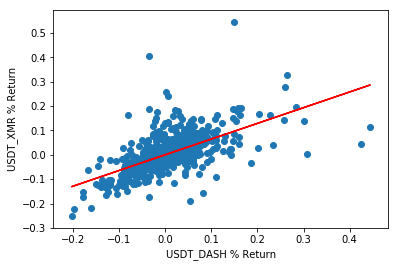

In [42]:
line=[model.params[0]*i for i in crypto_df_pct['USDT_DASH'].values]
plt.plot(crypto_df_pct['USDT_DASH'], line, c = 'r')
plt.scatter(crypto_df_pct['USDT_DASH'],crypto_df_pct['USDT_XMR'])
plt.xlabel('USDT_DASH % Return')
plt.ylabel('USDT_XMR % Return')

In [44]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = CryptoData(symbol = 'BTC_LTC', frequency = 300)


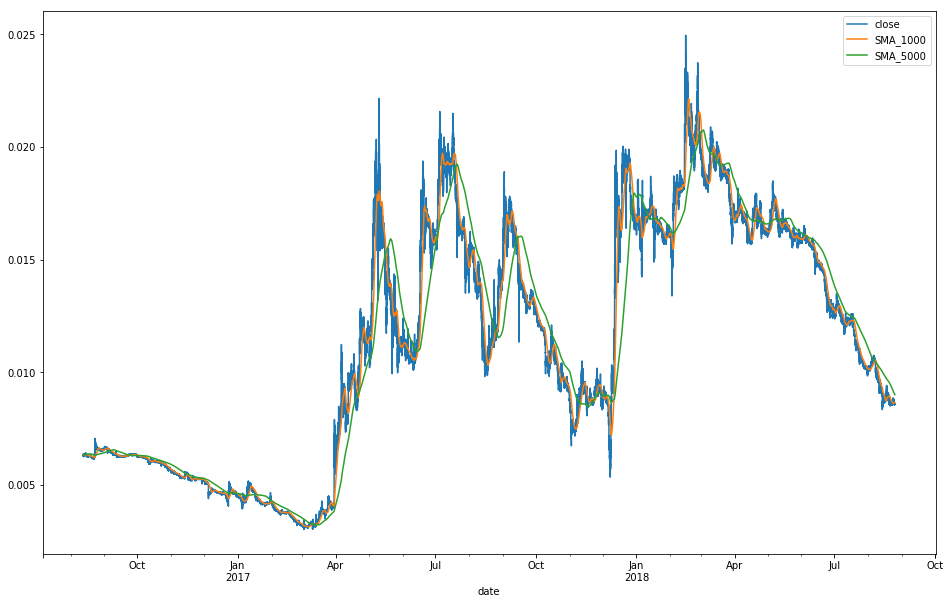

In [47]:
df['SMA_1000'] = df['close'].rolling(1000).mean()
df['SMA_5000'] = df['close'].rolling(5000).mean()
df[['close','SMA_1000','SMA_5000']][270000:].plot(figsize = (16,10))

In [48]:
def test_ma(df, lead, lag, pc_thresh = 0.025):
    ma_df = df.copy()
    ma_df['lead'] = ma_df['close'].rolling(lead).mean()
    ma_df['lag'] = ma_df['close'].rolling(lag).mean()
    ma_df.dropna(inplace = True)
    ma_df['lead-lag'] = ma_df['lead'] - ma_df['lag']
    ma_df['pc_diff'] = ma_df['lead-lag'] / ma_df['close']
    ma_df['regime'] = np.where(ma_df['pc_diff'] > pc_thresh, 1, 0)
    ma_df['regime'] = np.where(ma_df['pc_diff'] < -pc_thresh, -1, ma_df['regime'])
    ma_df['Market'] = np.log(ma_df['close'] / ma_df['close'].shift(1))
    ma_df['Strategy'] = ma_df['regime'].shift(1) * ma_df['Market']
    ma_df[['Market','Strategy']] = ma_df[['Market','Strategy']].cumsum().apply(np.exp)
    return ma_df

In [49]:
ma_df = test_ma(df, 1000, 5000).dropna()

In [50]:
ma_df['regime']plot(figsize=(16,5))

SyntaxError: invalid syntax (<ipython-input-50-6f11ad42621d>, line 1)

In [ ]:
ma_df[['Market','Strategy']].iloc[-1]

In [ ]:
Market       0.422360
Strategy    10.384434
Name: 2017-10-11 13:10:00, dtype: float64

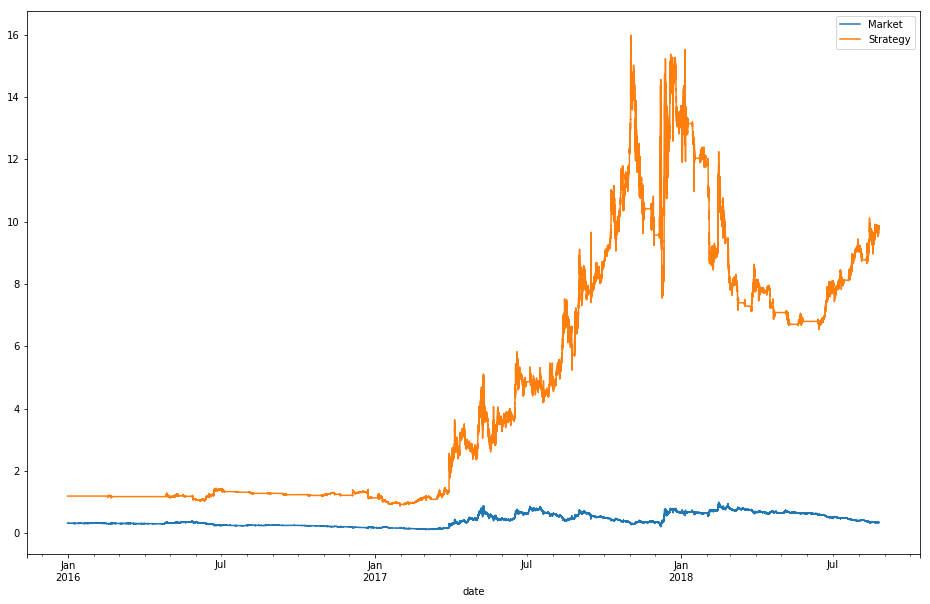

In [51]:
ma_df[['Market','Strategy']][200000:].plot(figsize = (16,10))

In [52]:
leads = np.arange(100, 4100, 100)
lags = np.arange(4100, 8100, 100)
lead_lags = [[lead,lag] for lead in leads for lag in lags]
pnls = pd.DataFrame(index=lags,columns = leads)

In [53]:
for lead, lag in lead_lags:
    pnls[lead][lag] = test_ma(df, lead, lag)['Strategy'][-1]
    print(lead,lag,pnls[lead][lag])

100 4100 0.11328771503631455
100 4200 0.16368707468689853
100 4300 0.1295252441083858
100 4400 0.10269318592265966
100 4500 0.1645653082429533
100 4600 0.23979398113242273
100 4700 0.16145520320561202
100 4800 0.19969320053601086
100 4900 0.2792761030777473
100 5000 0.17398668233235867
100 5100 1.5015949358881477
100 5200 1.9011482444753773
100 5300 2.8903882715267253
100 5400 4.43056310419405
100 5500 2.86709934096577
100 5600 2.8901573939092233
100 5700 4.24233682932997
100 5800 5.568885826249807
100 5900 7.246296118340465
100 6000 9.395189822591993
100 6100 8.96693907776296
100 6200 7.789858534637481
100 6300 6.254053642499489
100 6400 9.997635444677943
100 6500 4.596582866840753
100 6600 7.827060628171008
100 6700 7.6597529524072785
100 6800 8.983495375830195
100 6900 7.187766470915592
100 7000 9.05779720460039
100 7100 11.145299004178717
100 7200 8.959090622164533
100 7300 8.68813405884832
100 7400 9.927696578837459
100 7500 7.719308915870703
100 7600 10.507191605170252
100 7700 1

800 5900 27.768231938100737
800 6000 15.780773435114833
800 6100 29.623161447425577
800 6200 24.234667600453147
800 6300 29.649659167614974
800 6400 61.05998330216849
800 6500 35.61675960904272
800 6600 35.562576341474404
800 6700 59.45768005665466
800 6800 45.58258730033787
800 6900 47.98036350662441
800 7000 38.689899483306846
800 7100 51.71671458017228
800 7200 28.690994670416202
800 7300 26.527008884268934
800 7400 40.25830755313281
800 7500 32.34027737309148
800 7600 25.324837067651448
800 7700 18.764052322418635
800 7800 21.883193493279073
800 7900 25.20328587148079
800 8000 29.09662915168233
900 4100 21.614108232222183
900 4200 26.074173048715032
900 4300 22.240431736712246
900 4400 11.140186082977834
900 4500 10.415709648658773
900 4600 15.033579911238101
900 4700 18.705185096666458
900 4800 13.182254449634108
900 4900 14.363013211850589
900 5000 9.402915465687707
900 5100 6.242272527447494
900 5200 4.42121037185372
900 5300 8.25738548426048
900 5400 15.631869391198322
900 5500

1500 7000 9.99977997210595
1500 7100 7.184816458838367
1500 7200 10.095521001424505
1500 7300 10.261178504136621
1500 7400 6.750616029291023
1500 7500 7.206805958008385
1500 7600 8.47063718153224
1500 7700 6.403097018791212
1500 7800 5.770729099741793
1500 7900 5.753241269721282
1500 8000 5.917512922778259
1600 4100 3.6284177926886003
1600 4200 4.435113811284687
1600 4300 2.2523730159393813
1600 4400 1.8053247814139868
1600 4500 1.737689130417809
1600 4600 2.6008384721668962
1600 4700 2.879140454106974
1600 4800 5.531930441466486
1600 4900 4.4085755983805095
1600 5000 3.169620422470813
1600 5100 2.289317495352209
1600 5200 1.8316977519262152
1600 5300 1.7131546382639202
1600 5400 2.439456787267539
1600 5500 2.5201881598536464
1600 5600 5.011104366143809
1600 5700 4.737147697829371
1600 5800 4.573177310738824
1600 5900 3.2270480013627445
1600 6000 3.55432369085233
1600 6100 3.173309477947955
1600 6200 3.805254582597809
1600 6300 4.525359897335639
1600 6400 3.324520778692098
1600 6500 4.

2200 8000 4.442538974195538
2300 4100 0.6101791335911091
2300 4200 1.8236367912328793
2300 4300 2.049544773965399
2300 4400 2.3811653691632846
2300 4500 1.5285824846656269
2300 4600 3.1363418851684166
2300 4700 4.017526931167188
2300 4800 6.133637677375498
2300 4900 5.683707918250306
2300 5000 2.647260442048085
2300 5100 4.83660058975799
2300 5200 5.358961479011212
2300 5300 6.431930822530338
2300 5400 3.4198175409361826
2300 5500 5.089696722003541
2300 5600 3.9563955552887444
2300 5700 3.3578361423689858
2300 5800 1.7126420507850266
2300 5900 1.6025176922104265
2300 6000 1.4602212786401632
2300 6100 1.9215665046518668
2300 6200 1.365874618543662
2300 6300 1.018934936174182
2300 6400 1.2917728674677593
2300 6500 1.0376466211641038
2300 6600 2.368396445029973
2300 6700 4.10395114317355
2300 6800 4.581806259159169
2300 6900 2.043550702313222
2300 7000 5.424316585125251
2300 7100 6.0019487951086825
2300 7200 7.89636315940574
2300 7300 4.040993397621948
2300 7400 3.3633900296016495
2300 75

3000 4800 1.2298831677781616
3000 4900 2.266963899693748
3000 5000 2.0686359753299044
3000 5100 2.0606399646183013
3000 5200 2.2227958464857056
3000 5300 0.9787146006516592
3000 5400 1.5636309141486788
3000 5500 2.777581883080971
3000 5600 5.886056564442712
3000 5700 7.350920351945208
3000 5800 5.4043394965047975
3000 5900 5.498169828275246
3000 6000 7.792790205656941
3000 6100 4.3813241788924335
3000 6200 2.4883242958980865
3000 6300 6.515431212084483
3000 6400 6.820174643352967
3000 6500 7.577038550788135
3000 6600 9.827438905639545
3000 6700 7.254707387744881
3000 6800 7.303462299002391
3000 6900 7.968879413123192
3000 7000 3.3306691343122923
3000 7100 6.798309941273412
3000 7200 5.859529399220804
3000 7300 6.923323466111241
3000 7400 7.4491348971350435
3000 7500 6.46680562033772
3000 7600 6.827074099044746
3000 7700 7.437711797338708
3000 7800 2.4867241125550192
3000 7900 2.346103047000826
3000 8000 2.511581228477633
3100 4100 0.1134528731834324
3100 4200 0.1878253997565519
3100 43

3700 5400 0.3768825984142325
3700 5500 0.37351508718912946
3700 5600 0.2876233793445976
3700 5700 0.19318105706702132
3700 5800 0.17136602731525397
3700 5900 2.9117986853626765
3700 6000 3.7461506128676283
3700 6100 3.8593773407780843
3700 6200 7.400054967068646
3700 6300 8.848371242272728
3700 6400 8.089460100031864
3700 6500 12.301084489521088
3700 6600 9.73907256478104
3700 6700 17.614875050068015
3700 6800 10.64440546547458
3700 6900 12.60737918433504
3700 7000 28.657191142250912
3700 7100 16.85550269116046
3700 7200 3.485317640472619
3700 7300 3.0082437034323397
3700 7400 6.750679057946643
3700 7500 8.440540883978423
3700 7600 11.85596386898892
3700 7700 8.807758779043677
3700 7800 10.845465504488818
3700 7900 14.046576408917023
3700 8000 13.139765314125068
3800 4100 0.13550084053016234
3800 4200 0.09039346527333199
3800 4300 0.05820788322230328
3800 4400 0.0892432974594823
3800 4500 0.04619310194720993
3800 4600 0.05500094977365551
3800 4700 0.0616493549923045
3800 4800 0.4307957

In [54]:
PNLs = pnls[pnls.columns].astype(float)
plt.subplots(figsize = (14,10))
sns.heatmap(PNLs,cmap=’PiYG’)


SyntaxError: invalid character in identifier (<ipython-input-54-fc847a9bc230>, line 3)

In [ ]:
PNLs.max()

In [ ]:
PNLs[900][6600]

In [ ]:
'''Transaction Costs

Commissions. We have assumed no transaction costs, even though typical exchanges charge 25 basis point (bps) per dollar transacted. This would have negative impact on PnL.

Shorting. We assume that we can openly short a cryptocurrency pair and that we pay no fees for holding short positions. In reality, some exchanges do not support shorting and if they do, other fees are associated with such transactions.

Slippage. Another assumption is that we can always get filled on the close price. Given how ‘thin’ some crypto pairs books are, other things being equal, we will get filled at progressively worse prices as our positions grow in size. In addition, as other traders may use similar signals, it will only increase the chances that the price may “run away” from us as we try and get a fill.

Market Impact. In our backtest, we assume that our trades have no impact on subsequent market dynamics. In reality, market can react positively or negatively to a trade. Backtesting market impact creates a never ending spiral of complexity, as it depends, upon other things on liquidity, number of market participants and different states of the market.

Biases

Overfitting. When we optimised for the best possible combination of leading and lagging look-back periods, we have taken the available historical data and threw a bunch of numbers at it to see what sticks. Whilst we did find a pattern that suggested that best PnLs are the ones whose lead / lag ratio is around 1/8, we ultimately did that on historical data and there is no guarantee that the same results would hold for live performance. In order to overcome this phenomenon, we could split our data into two sets — the one we find the best parameters on and the one we test these parameters on. If the test PnL holds up, it is safe to assume that the parameters are significant. There is a whole study in Statistics dedicated primarily to mitigation of overfitting.

Exchange Risk

Last but definitely not least, it is almost impossible to model exchange risk. Historically, a large portion of exchanges get hacked or otherwise compromised. Finding trustworthy exchanges requires further research.'''